In [125]:
import numpy as np
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
!pip install scikit-learn
from sklearn.pipeline import Pipeline

# Upload the dataset.
df = pd.read_csv("Creative_Goal_Merged_2ndSept.csv")

In [126]:
# Sense check the data:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26702 entries, 0 to 26701
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      26702 non-null  int64  
 1   Unnamed: 0        26702 non-null  int64  
 2   date              26702 non-null  object 
 3   audience          26702 non-null  int64  
 4   creative_family   26702 non-null  object 
 5   creative_version  26702 non-null  object 
 6   platform          26702 non-null  object 
 7   clicks            26702 non-null  int64  
 8   spend             26702 non-null  float64
 9   impressions       26702 non-null  int64  
 10  reach             26702 non-null  int64  
 11  concatenated      26702 non-null  object 
 12  total_sessions    9388 non-null   float64
 13  completions       9388 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 2.9+ MB
None


In [127]:
# Convert audience variable to string.
df['audience'] = df['audience'].astype(str)
print(df.dtypes)

Unnamed: 0.1          int64
Unnamed: 0            int64
date                 object
audience             object
creative_family      object
creative_version     object
platform             object
clicks                int64
spend               float64
impressions           int64
reach                 int64
concatenated         object
total_sessions      float64
completions         float64
dtype: object


In [128]:
df.head()

,Unnamed: 0.1,Unnamed: 0,date,audience,creative_family,creative_version,platform,clicks,spend,impressions,reach,concatenated,total_sessions,completions
0,0,0,26/03/2022,6,CloserTwins,15s,OTT,0,2007.89,59059,46542,44646_6_CloserTwins_15s_OTT,NaN,NaN
1,1,1,26/03/2022,6,CloserTwins,30s,OTT,0,5350.32,157366,103407,44646_6_CloserTwins_30s_OTT,NaN,NaN
2,2,2,27/03/2022,6,CloserTwins,15s,OTT,0,1767.91,52000,41696,44647_6_CloserTwins_15s_OTT,NaN,NaN
3,3,3,27/03/2022,6,CloserTwins,30s,OTT,0,4946.23,145482,104088,44647_6_CloserTwins_30s_OTT,NaN,NaN
4,4,4,28/03/2022,6,CloserTwins,15s,OTT,0,1738.00,51118,43046,44648_6_CloserTwins_15s_OTT,NaN,NaN


In [129]:
# Drop unnecessary (to decision tree) columns:
df_cut = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'creative_version', 'concatenated'], axis=1)
df_cut.head()

,audience,creative_family,platform,clicks,spend,impressions,reach,total_sessions,completions
0,6,CloserTwins,OTT,0,2007.89,59059,46542,NaN,NaN
1,6,CloserTwins,OTT,0,5350.32,157366,103407,NaN,NaN
2,6,CloserTwins,OTT,0,1767.91,52000,41696,NaN,NaN
3,6,CloserTwins,OTT,0,4946.23,145482,104088,NaN,NaN
4,6,CloserTwins,OTT,0,1738.00,51118,43046,NaN,NaN


In [130]:
# Drop NAN values to accomodate for modelling.
df_cut = df_cut.dropna(subset='completions')
print(df_cut.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9388 entries, 12 to 26701
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   audience         9388 non-null   object 
 1   creative_family  9388 non-null   object 
 2   platform         9388 non-null   object 
 3   clicks           9388 non-null   int64  
 4   spend            9388 non-null   float64
 5   impressions      9388 non-null   int64  
 6   reach            9388 non-null   int64  
 7   total_sessions   9388 non-null   float64
 8   completions      9388 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 733.4+ KB
None


In [131]:
# General stats.
df_cut.describe()

,clicks,spend,impressions,reach,total_sessions,completions
count,9388.000000,9388.000000,9388.000000,9388.000000,9388.000000,9388.000000
mean,5.169578,48.036751,3260.282488,916.168406,5.974542,0.539838
std,10.715940,270.048927,9939.650790,5455.300580,14.705732,4.106499
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,5.248497,201.000000,26.000000,1.000000,0.000000
50%,2.000000,16.126418,1004.000000,127.000000,2.000000,0.000000
75%,5.000000,33.244321,3124.500000,453.250000,5.000000,0.000000
max,113.000000,5410.670000,159138.000000,120168.000000,157.000000,63.000000


In [132]:
unique_values_completions = df_cut['completions'].unique()
print(unique_values_completions)

[ 0.  6.  2.  1.  3.  4. 57. 49. 48.  5. 28. 14. 33. 54. 41. 27. 26. 22.
 42. 12. 31. 40. 21. 35. 56.  8. 34. 63. 47.  7. 37. 51. 43. 30. 44.  9.
 38. 23. 32. 19. 15. 20. 13. 25. 16. 24. 18. 45. 58. 46. 50. 10.]


In [133]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_cut[['audience']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

#view final df
final_df.head()

# At this point there were issues with hot encoding and recognising multiple binary variable for craetive_family, audience and platform and these were resolved in excel - a ready dataset was used.
# Unnecessary variable columns were removed.

,Unnamed: 0.1,Unnamed: 0,date,audience,creative_family,creative_version,platform,clicks,spend,impressions,reach,concatenated,total_sessions,completions,0,1,2,3,4,5
0,0,0,26/03/2022,6,CloserTwins,15s,OTT,0,2007.89,59059,46542,44646_6_CloserTwins_15s_OTT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,26/03/2022,6,CloserTwins,30s,OTT,0,5350.32,157366,103407,44646_6_CloserTwins_30s_OTT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
2,2,2,27/03/2022,6,CloserTwins,15s,OTT,0,1767.91,52000,41696,44647_6_CloserTwins_15s_OTT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
3,3,3,27/03/2022,6,CloserTwins,30s,OTT,0,4946.23,145482,104088,44647_6_CloserTwins_30s_OTT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
4,4,4,28/03/2022,6,CloserTwins,15s,OTT,0,1738.00,51118,43046,44648_6_CloserTwins_15s_OTT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
# Extending dummy variables in excel in order to label them.
dt_completion = pd.read_csv("Decison_Tree_Completion.csv")

In [142]:
dt_completion.head()

,Unnamed: 0,date,audience,clicks,spend,impressions,reach,total_sessions,completions_F_T,Audience_1,...,Closer_Twins,Competitive_Opportunity,SEM_Ads,Unfair_Advantage,Domain_Dsiplay,Facebook,Google_SEM,Linkedin,OTT,User_ID_Display
0,1,01/04/2022,6,0,1732.47,50954,35475,18,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,01/04/2022,6,0,5320.25,156481,86030,59,1,0,...,1,0,0,0,0,0,0,0,1,0
2,3,02/04/2022,6,0,1723.12,50681,38699,12,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,02/04/2022,6,0,5227.50,153750,90328,39,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,03/04/2022,6,0,1712.05,50357,35909,16,0,0,...,1,0,0,0,0,0,0,0,1,0


In [144]:
dt_completion = dt_completion.drop(['Unnamed: 0', 'date', 'audience'], axis=1)

In [146]:
dt_completion.head()

,clicks,spend,impressions,reach,total_sessions,completions_F_T,Audience_1,Audience_2,Audience_3,Audience_4,...,Closer_Twins,Competitive_Opportunity,SEM_Ads,Unfair_Advantage,Domain_Dsiplay,Facebook,Google_SEM,Linkedin,OTT,User_ID_Display
0,0,1732.47,50954,35475,18,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,5320.25,156481,86030,59,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1723.12,50681,38699,12,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,5227.50,153750,90328,39,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1712.05,50357,35909,16,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [147]:
dt_completion.columns = ['clicks', 'spend', 'impressions', 'reach', 'total_sessions', 'completions_ft', 'audience1', 'audience2', 'audience3', 'audience4', 
                         'audience5', 'audience6', 
                         'close_faster', 'closer_twins', 'competitive_op', 'SEM_ads', 'unfair_adv', 'domain_display', 'facebook', 'google_SEM', 'linkedin', 'OTT', 'user_id_display']
dt_completion.head()

,clicks,spend,impressions,reach,total_sessions,completions_ft,audience1,audience2,audience3,audience4,...,closer_twins,competitive_op,SEM_ads,unfair_adv,domain_display,facebook,google_SEM,linkedin,OTT,user_id_display
0,0,1732.47,50954,35475,18,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,5320.25,156481,86030,59,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1723.12,50681,38699,12,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,5227.50,153750,90328,39,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1712.05,50357,35909,16,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [148]:
X = dt_completion.drop('completions_ft', axis = 1)
y = dt_completion['completions_ft']

In [149]:
# Create testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

# Create classifier
clf=DecisionTreeClassifier(random_state=0)

# Fit the training data
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [150]:
# Predict using the training data
y_train_predicted=clf.predict(X_train)

# Predict using the test data
y_test_predicted=clf.predict(X_test)

# Print accuracy values
print(accuracy_score(y_train,y_train_predicted)) # prediction is the same as the observation
print(accuracy_score(y_test,y_test_predicted)) # prediction on 'unseen data'

1.0
0.9282925097621584


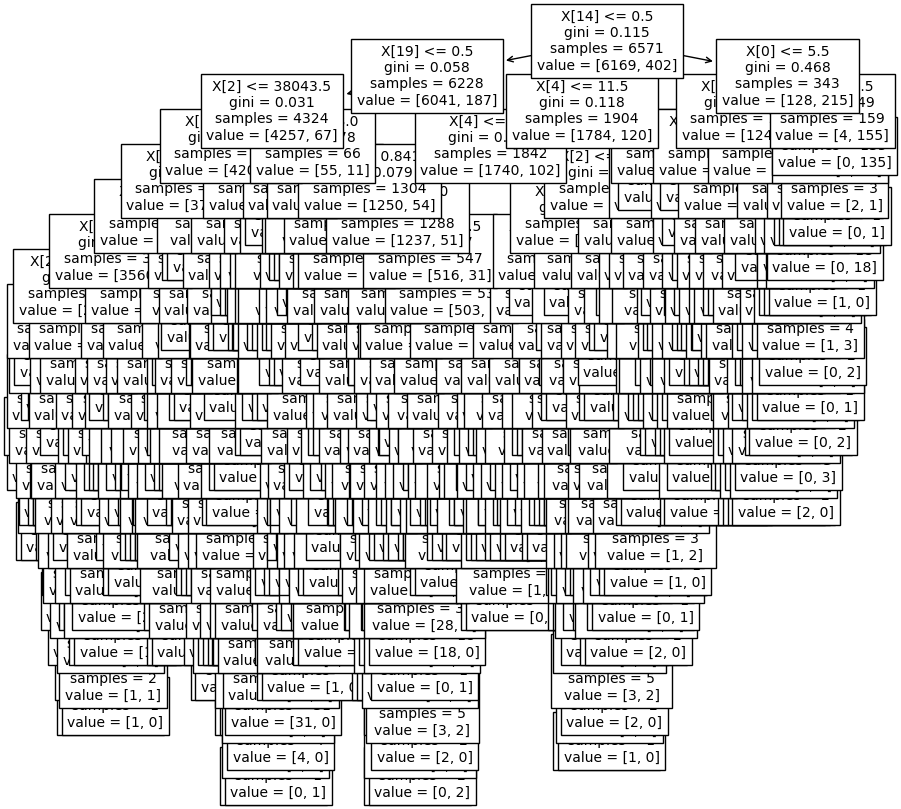

In [151]:
# Plot the tree
# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, fontsize=10)

# Print the plot with plt.show().
plt.show() 

In [152]:
# Pruning the model using (pre-)pruning using supplied parameters
# In practice we would use a specific method such as cost complexity pruning to evaluate alternatives.
clfp = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 6,
                             min_samples_leaf = 5,
                             min_samples_split = 5)
clfp.fit(X_train,y_train)
y_predicted=clfp.predict(X_test)
accuracy_score(y_test,y_predicted)

0.9495917642882499

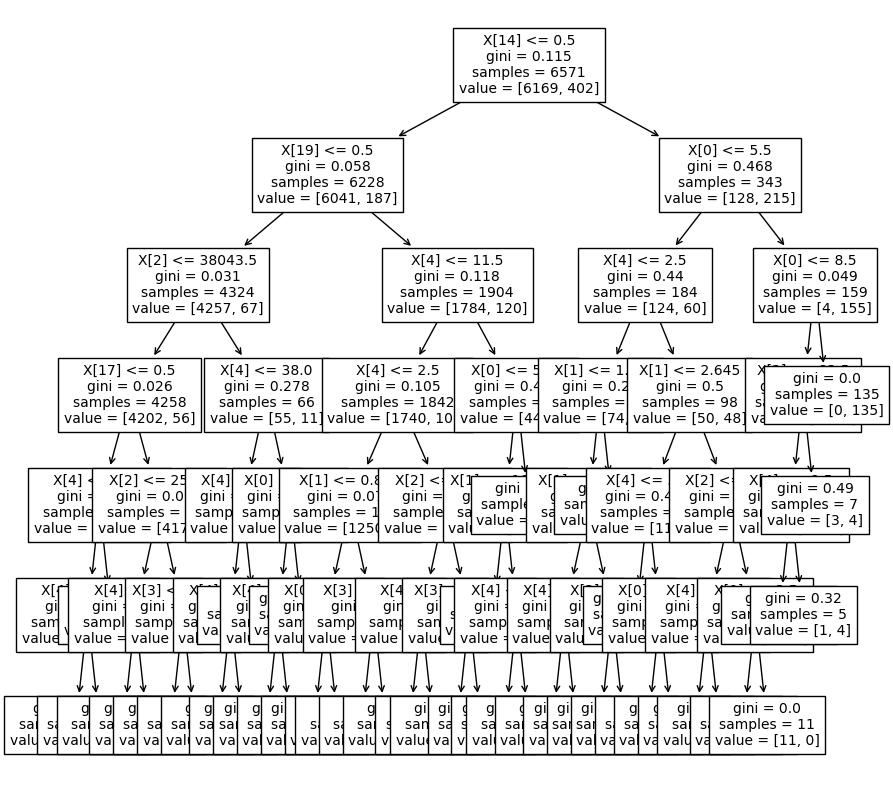

In [153]:
# Plot the pruned tree
# Plot the decision tree to create the visualisation:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clfp, fontsize=10)

# Print the plot with plt.show().
plt.show() 

In [154]:
# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_predicted)
confusion = pd.DataFrame(confusion_matrix, index=['is_completion', 'is_notcompletion'],
                         columns=['predicted_iscompletion', 'predicted_notcompletion'])

# View the output.
confusion

,predicted_iscompletion,predicted_notcompletion
is_completion,2614,21
is_notcompletion,121,61


<AxesSubplot:>

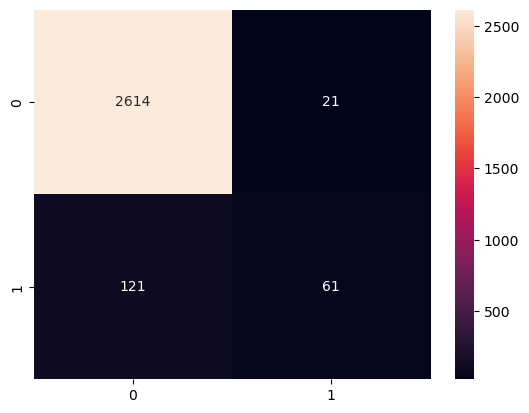

In [155]:
# Plot the confusion_matrix. #NOTE: Color scheme misleading as we are not plotting %'s
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [156]:
# Print the accuracy and classification report.
print(metrics.accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

0.9495917642882499
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2635
           1       0.74      0.34      0.46       182

    accuracy                           0.95      2817
   macro avg       0.85      0.66      0.72      2817
weighted avg       0.94      0.95      0.94      2817



We need to SMOTE to balance data set maybe.  In progress, may not be finished on time for submission.